In [1]:
#link dataset: https://www.kaggle.com/shwetabh123/mall-customers
#nume fisier dataset: Mall_Customers.csv (in acelasi director cu codul)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.offline as py
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [3]:
data = pd.read_csv('Mall_Customers.csv')
print(f"Forma setului de date: {data.shape}")
print(data)

Forma setului de date: (200, 5)
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


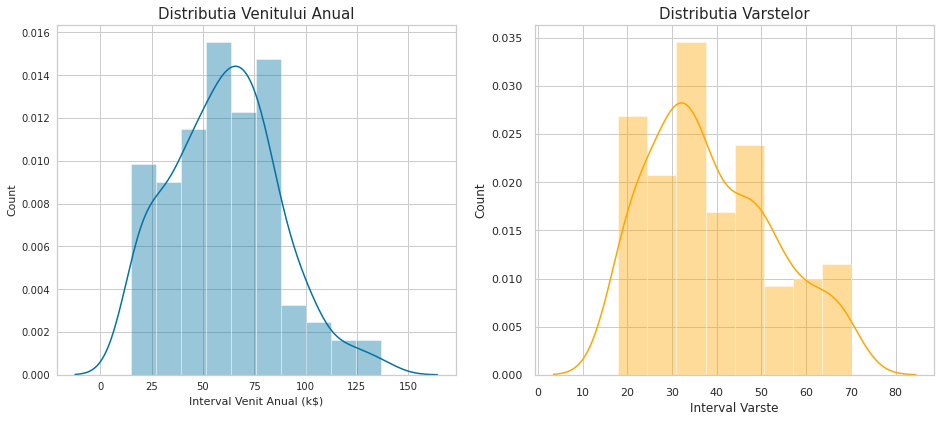

In [3]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distributia Venitului Anual', fontsize = 15)
plt.xlabel('Interval Venit Anual (k$)')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'orange')
plt.title('Distributia Varstelor', fontsize = 15)
plt.xlabel('Interval Varste')
plt.ylabel('Count')
plt.show()

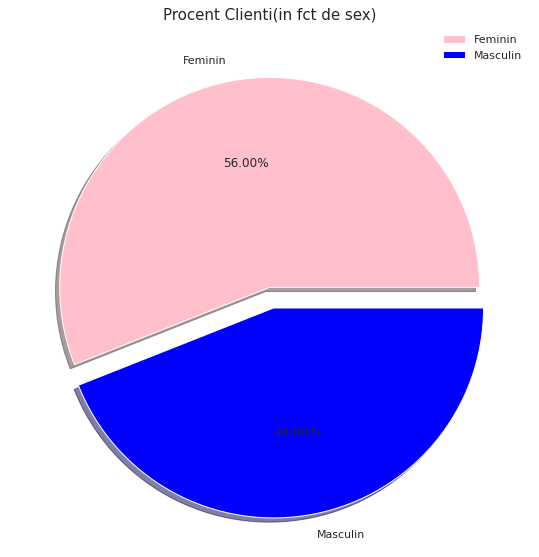

In [4]:
labels = ['Feminin', 'Masculin']
size = data['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Procent Clienti(in fct de sex)', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

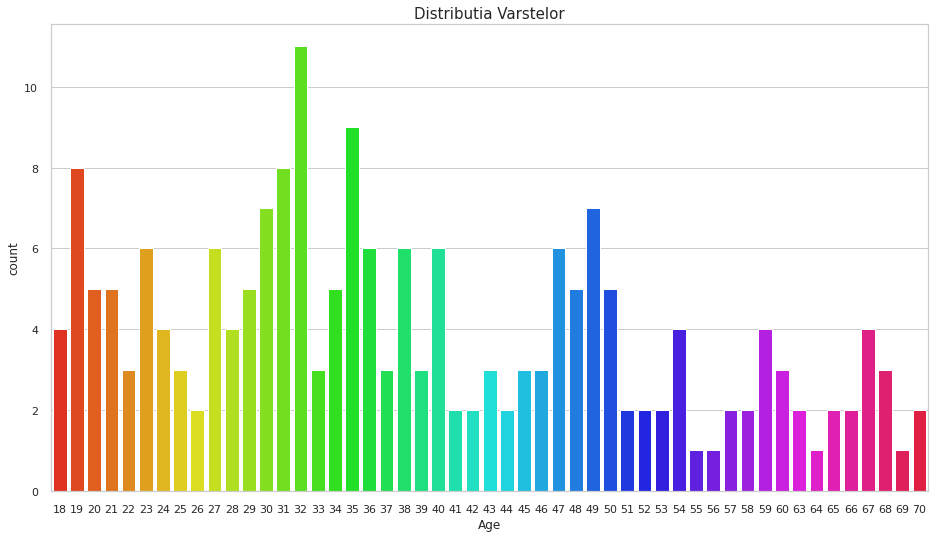

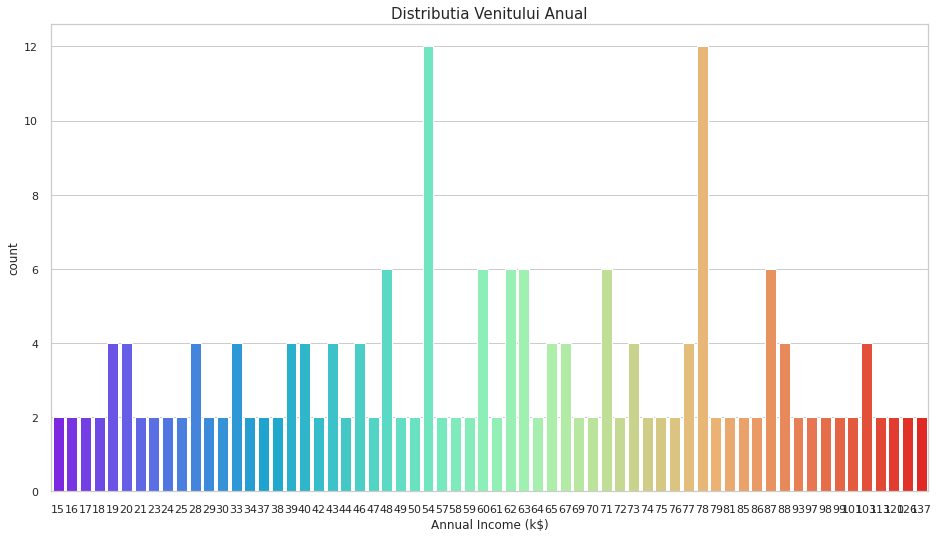

In [5]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distributia Varstelor', fontsize = 15)
plt.show()

plt.rcParams['figure.figsize'] = (14, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distributia Venitului Anual', fontsize = 15)
plt.show()

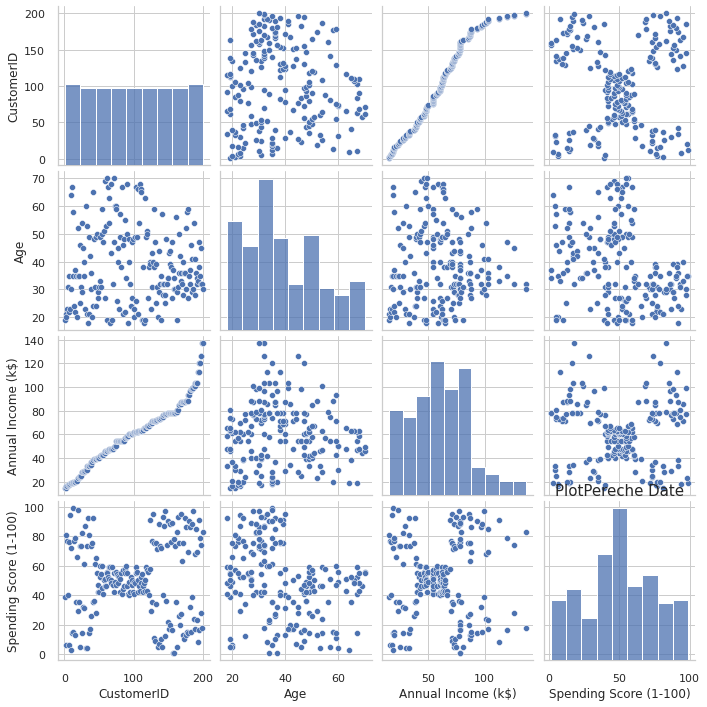

In [7]:
sns.pairplot(data)
plt.title('PlotPereche Date', fontsize = 15)
plt.show()

In [8]:
x = data.iloc[:, [3, 4]].values
# let's check the shape of x
print(x.shape)

(200, 2)


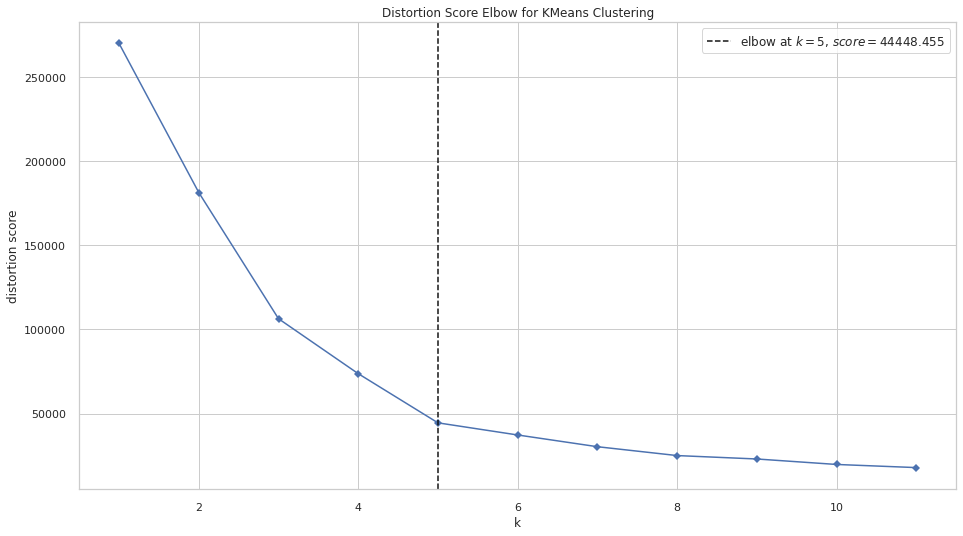

PARTITIA OPTIMALA PENTRU CLUSTERIZARE ESTE: K = 5(Metoda 'cotului')


In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings=False)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

print("PARTITIA OPTIMALA PENTRU CLUSTERIZARE ESTE: K = 5(Metoda 'cotului')")

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[ 70  71  71  73  73  74  75  77  77  78  78  78  78  78  78  79  81  85
  86  87  87  87  88  88  93  97  98  99 101 103 103 113 120 126 137] [29 11  9  5  7 10  5 12 36 22 17 20 16  1  1 35  5 26 20 27 13 10 13 15
 14 32 15 39 24 17 23  8 16 28 18]
Componente cluster 0(AVAR):
	VENITURI(k$):[ 70  71  71  73  73  74  75  77  77  78  78  78  78  78  78  79  81  85
  86  87  87  87  88  88  93  97  98  99 101 103 103 113 120 126 137]
	SCOR:[29 11  9  5  7 10  5 12 36 22 17 20 16  1  1 35  5 26 20 27 13 10 13 15
 14 32 15 39 24 17 23  8 16 28 18]
Componente cluster 1(General):
	VENITURI(k$

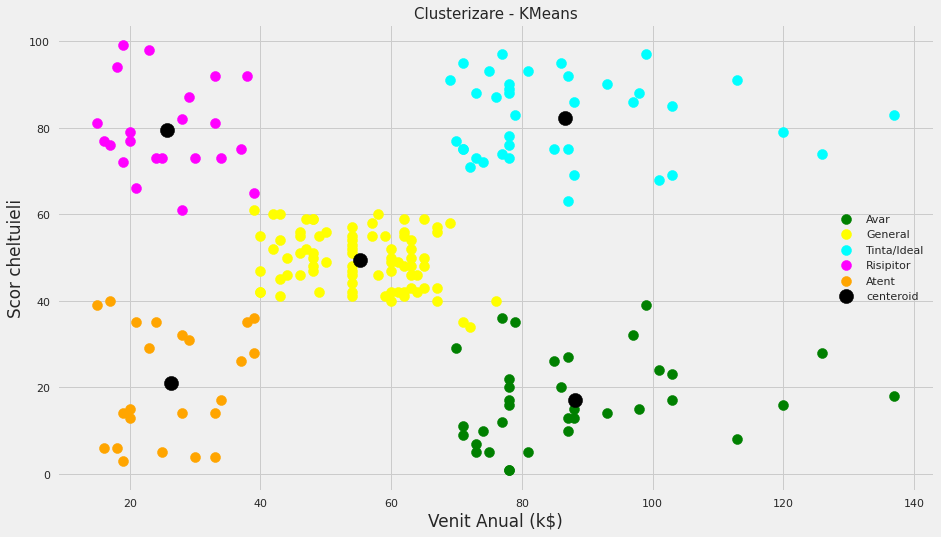

In [12]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

print(x[y_means == 0, 0], x[y_means == 0, 1])

# AFISARE COMPONENTE CLUSTERE
print(f"Componente cluster 0(AVAR):\n\tVENITURI(k$):{x[y_means == 0, 0]}\n\tSCOR:{x[y_means == 0, 1]}")
print(f"Componente cluster 1(General):\n\tVENITURI(k$):{x[y_means == 1, 0]}\n\tSCOR:{x[y_means == 1, 1]}")
print(f"Componente cluster 2(Tinta/Ideal):\n\tVENITURI(k$):{x[y_means == 2, 0]}\n\tSCOR:{x[y_means == 2, 1]}")
print(f"Componente cluster 3(Risipitor):\n\tVENITURI(k$):{x[y_means == 3, 0]}\n\tSCOR:{x[y_means == 3, 1]}")
print(f"Componente cluster 4(Atent):\n\tVENITURI(k$):{x[y_means == 4, 0]}\n\tSCOR:{x[y_means == 4, 1]}")

# PLOT
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'Avar')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Tinta/Ideal')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Risipitor')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Atent')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centeroid')


plt.style.use('fivethirtyeight')
plt.title('Clusterizare - KMeans', fontsize = 15)
plt.xlabel('Venit Anual (k$)')
plt.ylabel('Scor cheltuieli')
plt.legend()
plt.show()

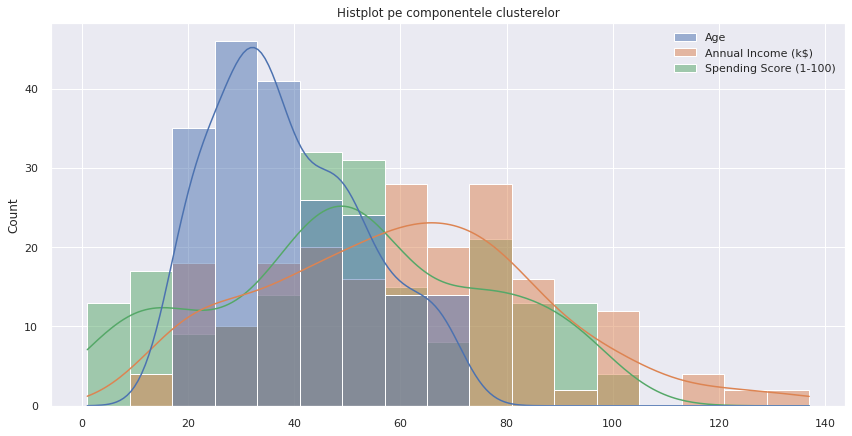

In [187]:
sns.set()
fig, axs = plt.subplots( figsize=(12, 6))
sns.histplot(data=data.iloc[: , 2:5], kde=True, common_norm=False)
plt.tight_layout()
plt.title("Histplot pe componentele clusterelor")
plt.show()

In [188]:
print("---" * 5 + "Dendrograma pentru clusterele obtinute cu KMeans" + "---" * 5)
fig = ff.create_dendrogram(x, labels = y_means)
fig.update_layout(width=800, height=500)
fig.show()

---------------Dendrograma pentru clusterele obtinute cu KMeans---------------


Harta clusterelor in functie de specificatii si tipuri


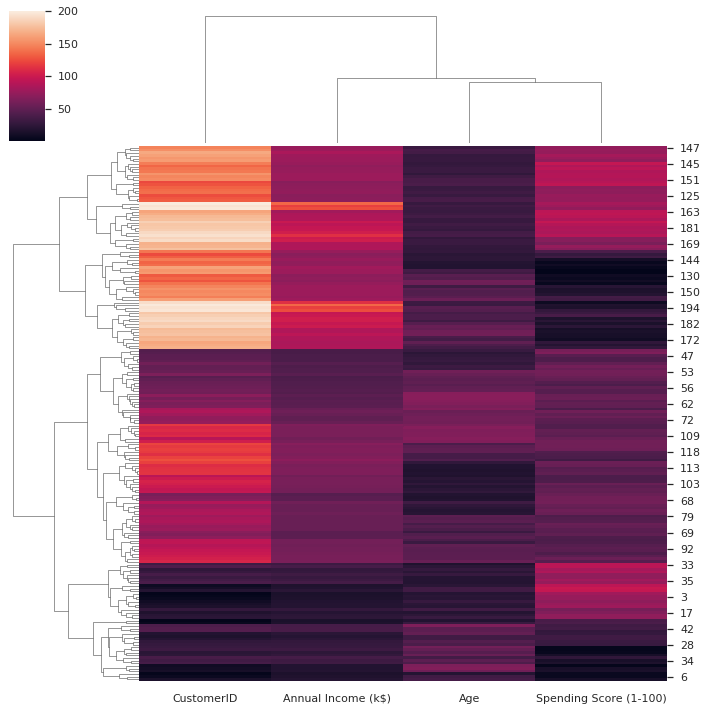

In [189]:
print("Harta clusterelor in functie de specificatii si tipuri")
sns.set_theme(color_codes=True)
df = data.drop(['Gender'],axis=1)
g = sns.clustermap(df)

In [190]:
# 2. PARTITIE - cu ajutorul AgglomerativeClustering(algoritm de tip ierarhic), metoda 2--------------------------------------
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
ward_pred = ward.fit_predict(x)

In [191]:
from sklearn.metrics import adjusted_rand_score
ward_ar_score = adjusted_rand_score(y_means, ward_pred)

In [192]:
print(ward)
print( "Scores-Ward:", ward_ar_score)

AgglomerativeClustering(n_clusters=5)
Scores-Ward: 0.9419606318143182


Componente cluster 0(AVAR):
	VENITURI(k$):[ 71  71  73  73  74  75  77  78  78  78  78  78  78  81  85  86  87  87
  87  88  88  93  97  98  99 101 103 103 113 120 126 137]
	SCOR:[11  9  5  7 10  5 12 22 17 20 16  1  1  5 26 20 27 13 10 13 15 14 32 15
 39 24 17 23  8 16 28 18]
Componente cluster 1(General):
	VENITURI(k$):[39 39 40 40 40 40 42 42 43 43 43 43 44 44 46 46 46 46 47 47 48 48 48 48
 48 48 49 49 50 50 54 54 54 54 54 54 54 54 54 54 54 54 57 57 58 58 59 59
 60 60 60 60 60 60 61 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 65 65
 65 65 67 67 67 67 69 70 71 72 76 77 79]
	SCOR:[61 65 55 47 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48
 59 47 55 42 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41
 49 40 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50
 43 59 43 57 56 40 58 29 35 34 40 36 35]
Componente cluster 2(Tinta/Ideal):
	VENITURI(k$):[ 69  70  71  71  71  72  73  73  74  75  76  77  77  78  78  78  78  78
  78  79  81  85  86  87  87 

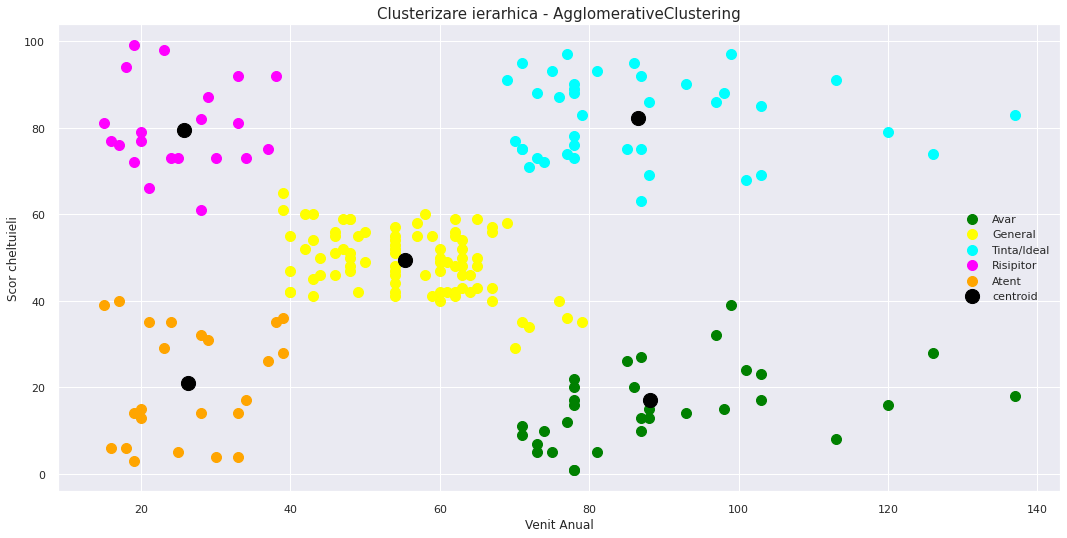

In [196]:
####
# AFISARE COMPONENTE CLUSTERE
print(f"Componente cluster 0(AVAR):\n\tVENITURI(k$):{x[ward_pred == 0, 0]}\n\tSCOR:{x[ward_pred == 0, 1]}")
print(f"Componente cluster 1(General):\n\tVENITURI(k$):{x[ward_pred == 1, 0]}\n\tSCOR:{x[ward_pred == 1, 1]}")
print(f"Componente cluster 2(Tinta/Ideal):\n\tVENITURI(k$):{x[ward_pred == 2, 0]}\n\tSCOR:{x[ward_pred == 2, 1]}")
print(f"Componente cluster 3(Risipitor):\n\tVENITURI(k$):{x[ward_pred == 3, 0]}\n\tSCOR:{x[ward_pred == 3, 1]}")
print(f"Componente cluster 4(Atent):\n\tVENITURI(k$):{x[ward_pred == 4, 0]}\n\tSCOR:{x[ward_pred == 4, 1]}")

# PLOT
plt.scatter(x[ward_pred == 0, 0], x[ward_pred == 0, 1], s = 100, c = 'green', label = 'Avar')
plt.scatter(x[ward_pred == 1, 0], x[ward_pred == 1, 1], s = 100, c = 'yellow', label = 'General')
plt.scatter(x[ward_pred == 2, 0], x[ward_pred == 2, 1], s = 100, c = 'cyan', label = 'Tinta/Ideal')
plt.scatter(x[ward_pred == 3, 0], x[ward_pred == 3, 1], s = 100, c = 'magenta', label = 'Risipitor')
plt.scatter(x[ward_pred == 4, 0], x[ward_pred == 4, 1], s = 100, c = 'orange', label = 'Atent')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centroid')

plt.style.use('fivethirtyeight')
plt.title('Clusterizare ierarhica - AgglomerativeClustering', fontsize = 15)
plt.xlabel('Venit Anual')
plt.ylabel('Scor cheltuieli')
plt.legend()
plt.grid(True)
plt.show()

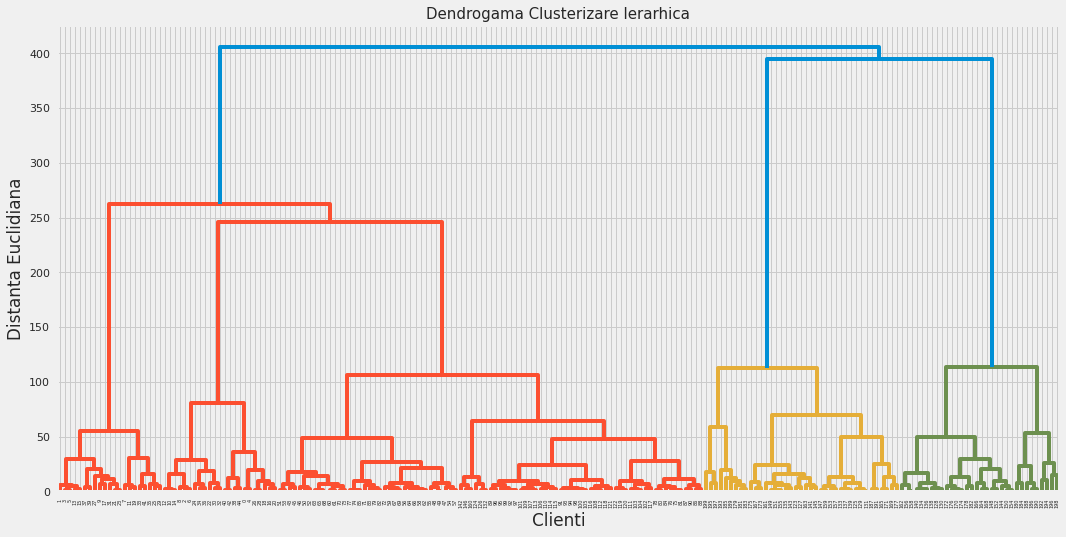

In [194]:
dendrogram = dendrogram(linkage(x, method = 'ward'))
plt.title('Dendrogama Clusterizare Ierarhica', fontsize = 15)
plt.xlabel('Clienti')
plt.ylabel('Distanta Euclidiana')
plt.show()

Harta clusterelor in functie de specificatii si tipuri


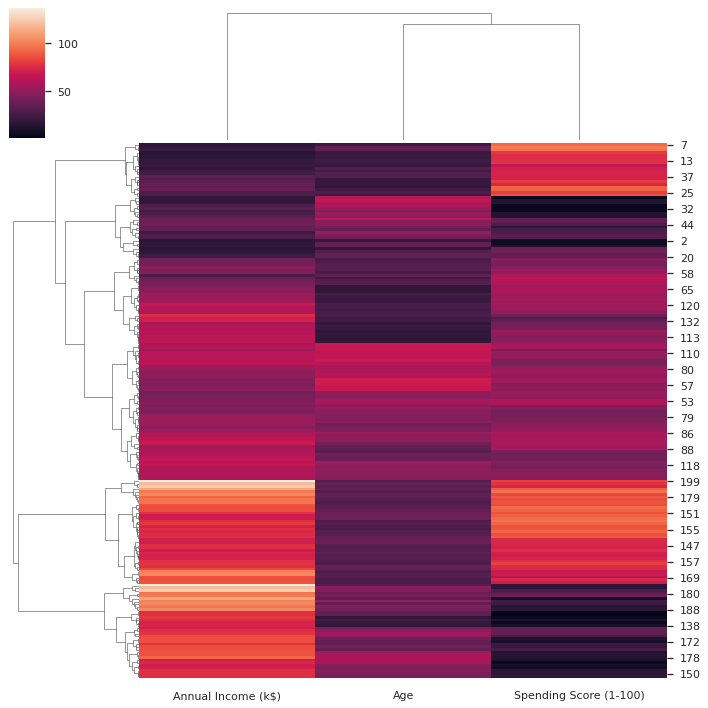

In [195]:
print("Harta clusterelor in functie de specificatii si tipuri")
sns.set_theme(color_codes=True)
df = data.drop(['CustomerID','Gender'],axis=1)
g = sns.clustermap(df, method='ward')